In [1]:
from DataAnalysis import *
from Plotting import *
from QueryWriter import *

# Global Figures

In [2]:
filtered_days=[]#'2018-06-07', '2018-06-06']
dimensions =["cbs_media_source_id"]
nb_days = -1
table_name = "clicks"
volume_labels = ["Count", "Output", "Ratio"]

In [3]:
compute_query(dimensions, nb_days, table_name)

hive -e "select cbs_media_source_id, sum(A.total) as total, sum(A.c) as c 
 from (select cbs_media_source_id,1 as total, CASE WHEN label_nbclicks>0 THEN 1 ELSE 0 END as c 
 from cbsdata.bid_request_imp_clicks 
 where day < current_date  ) as A 
 group by cbs_media_source_id;">clicks_cbs_media_source_id_alldays.txt


In [4]:
filename = get_file_path(dimensions, nb_days, table_name, with_label_number = False)
df_file = read_and_clean(filename,dimensions, ["Count"], ascending = False)
df_by_dimensions = split_dimensions(df_file, dimensions,sortingLabels="Count", ascending = False)

In [5]:
tables_by_dimensions =[(df_by_dimensions[i], dimensions[i]) for i in range(0,len(dimensions))]
display(display_global_rows(tables_by_dimensions, volume_labels))  

+--------------------------------+------------+-------------+------------------+
|                                |    Mean    |     Std     | Std/Mean percent |
+================================+============+=============+==================+
| Count per cbs_media_source_id  | 32,801,281 | 143,563,289 | 437.7%           |
+--------------------------------+------------+-------------+------------------+
| Output per cbs_media_source_id | 49,409     | 179,590     | 363.5%           |
+--------------------------------+------------+-------------+------------------+
| Ratio per cbs_media_source_id  | 0.440      | 0.790       | 177.7%           |
+--------------------------------+------------+-------------+------------------+


In [6]:
dimension = dimensions[0]
all_values = df_file[dimension].unique()
cardinality = len(all_values)
max_value = max(all_values)
min_value = min(all_values)

print("cardinality = "+ str(cardinality))
print("min value = "+ str(min_value))
print("max value = "+ str(max_value))

cardinality = 194
min value = 65
max value = 804


In [7]:
volume_label = "Count" #("Count", "Output", "Ratio")

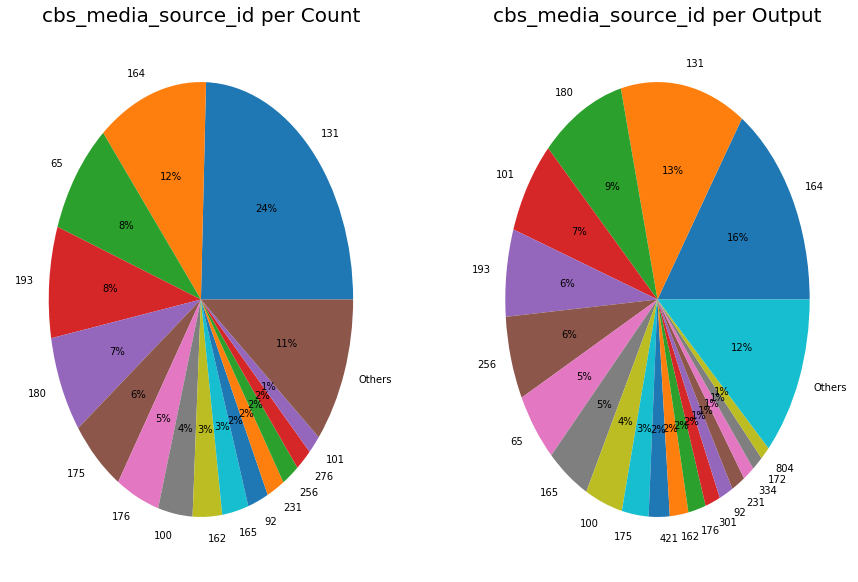

In [8]:
plt.figure(figsize=(15, 10))
volume_label = "Count"
[top_ids, df_crop_count] = get_top_values_for_aggregator(df_file, dimensions[0], volume_label, cropping_threshold = 1, subplot=221)
plot_pie_df_subplot(df_crop_count, "Percentage " + volume_label, dimensions[0],  dimensions[0] + " per " + volume_label, 121)

volume_label = "Output"
[top_ids, df_crop] = get_top_values_for_aggregator(df_file, dimensions[0], volume_label, cropping_threshold = 1, subplot=221)
plot_pie_df_subplot(df_crop, "Percentage " + volume_label, dimensions[0],  dimensions[0] + " per " + volume_label, 122)


/Users/j.bertrand/Documents/Dev/Code/CBSPrediction/tools/Plotting.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["mean"] = m
/Users/j.bertrand/Documents/Dev/Code/CBSPrediction/tools/Plotting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["mean+std"] = s + m
/Users/j.bertrand/Documents/Dev/Code/CBSPrediction/tools/Plotting.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

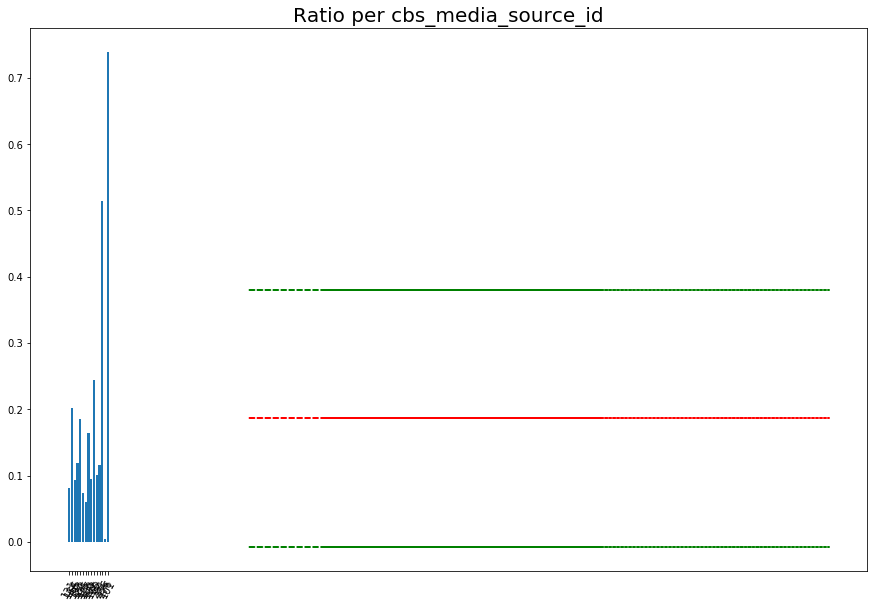

In [10]:
i = 0
volume_label = "Ratio"

df_crop_no_other = compute_ratio(df_crop_count)[:-1]
plot_bar2(df_crop_no_other, dimensions[i],volume_label, volume_label + ' per ' + dimensions[i], True)


In [11]:
import os
statinfo = os.stat(filename)
sizeof_fmt(statinfo.st_size)

'2.9KB'

Depending of the size of the previous results, you can decide the number of days of the next query